# Estimation of Clustering Parameter

**What is the Elbow Method?**

A technique used to determine the optimal number of clusters (KK) in clustering. It is based on the Sum of Squared Errors (SSE) or Within-Cluster Sum of Squares (WCSS).

The goal is to find a balance between too few and too many clusters.

**How it Works:**
1. Compute clustering for different values of `K` (e.g., 1 to 10).
2. Calculate the WCSS (Within-Cluster Sum of Squares) for each `K`.
3. Plot `K` vs. `WCSS`.
4. Identify the `elbow point` where WCSS starts decreasing at a slower rate.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [30]:
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=1.0, random_state=42)

In [31]:
# Range of K values to test
K_range = range(1, 11)
inertia_values = []

# Compute inertia for different K values
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)  #Computes WCSS

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(X):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], edgecolor='k', legend=False)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

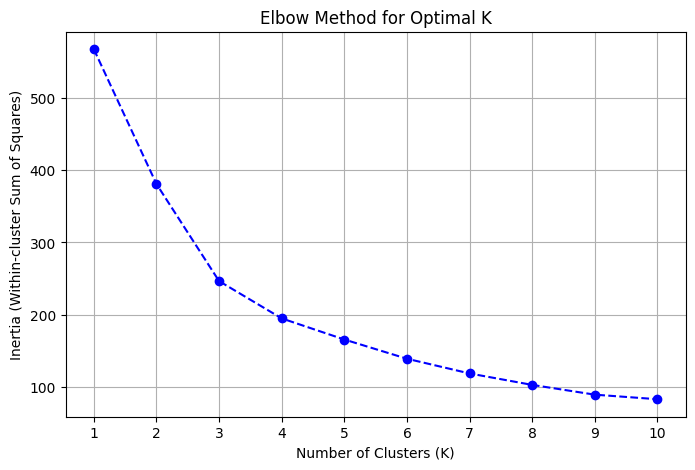

In [34]:
# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid()
plt.show()

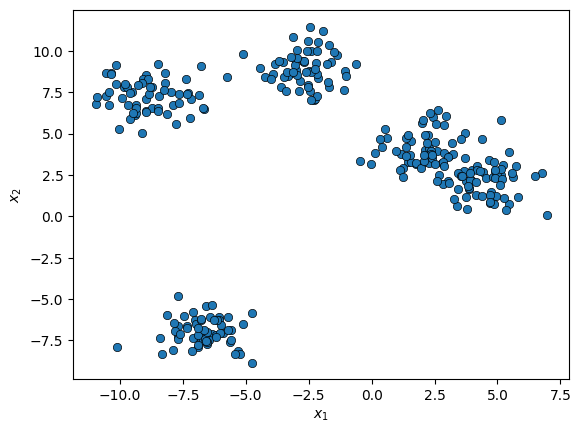

In [17]:
plot_data(X)

# Evaluation of Clustering Methods

## Internal Measures

### Silhouette Index

The silhouette index provides an overall measure for the quality of the clustering:

- An index close to 1 means that the clusters are compact and well separated.
- An index around 0 indicates overlapping clusters.
- An index close to -1 means the clustering has either too many or too few clusters.

Scikit-Learn’s module `sklearn.metrics` provides many clustering evaluation metrics, including the ones discussed in this article. To demonstrate the usage of these metrics, we will first create a synthetic dataset and apply k-means clustering to it using various values of k. Then, we will use the evaluation metrics to compare the results of these clusterings.

First, we use the make_blobs() function to generate a dataset with 500 points chosen randomly from 3 normally-distributed clusters, and then normalize it to ensure that the features have the same scale:

In [35]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.6, random_state=0)
X = StandardScaler().fit_transform(X)

Let’s plot the dataset:

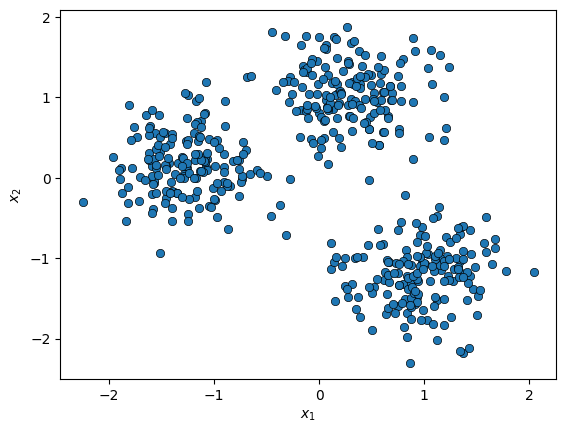

In [36]:
plot_data(X)

Next, we run k-means clustering on this dataset with `k = 2, 3, 4`, and store the clustering results in three different variables:

In [44]:
from sklearn.cluster import KMeans

labels_k2 = KMeans(n_clusters=2, random_state=0).fit_predict(X)
labels_k3 = KMeans(n_clusters=3, random_state=0).fit_predict(X)
labels_k4 = KMeans(n_clusters=4, random_state=0).fit_predict(X)
labels_k5 = KMeans(n_clusters=5, random_state=0).fit_predict(X)

We can now use the function `sklearn.metrics.silhouette_score()` to compute the silhouette score for each one of these clusterings. This function takes as arguments the dataset X and the cluster labels:

In [45]:
from sklearn.metrics import silhouette_score

print(f'SI(2 clusters): {silhouette_score(X, labels_k2):.3f}')
print(f'SI(3 clusters): {silhouette_score(X, labels_k3):.3f}')
print(f'SI(4 clusters): {silhouette_score(X, labels_k4):.3f}')
print(f'SI(5 clusters): {silhouette_score(X, labels_k5):.3f}')

SI(2 clusters): 0.570
SI(3 clusters): 0.659
SI(4 clusters): 0.528
SI(5 clusters): 0.434


The highest silhouette score is obtained for k = 3. The score is below 1, indicating that the clusters are not completely separated from each other.

To compute the silhouette coefficients for each sample, we can use the function `sklearn.metrics.silhouette_samples`. Based on these coefficients, we can build a silhouette plot, which provides a way to assess how well each object lies within its cluster. In this plot, each point’s silhouette index is represented as a horizontal bar (longer bars indicate better clustering). These bars are arranged and grouped by cluster. The height of each cluster section indicates the number of points in that cluster.

Let’s write a function to build a silhouette plot for a given dataset and cluster labels:

In [40]:
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def silhouette_plot(X, cluster_labels):
    n_clusters = len(np.unique(cluster_labels))
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette coefficient for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Get the silhouette coefficients for samples in cluster i and sort them
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()

        # Compute the height of the cluster section
        cluster_size = len(cluster_silhouette_values)
        y_upper = y_lower + cluster_size

        # Plot the coefficients for cluster i using horizontal bars
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Show the cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * cluster_size, str(i))

        # Compute the new y_lower for the next cluster
        y_lower = y_upper + 10

    # Draw a vertical line for the average silhouette score
    plt.axvline(x=silhouette_avg, color='red', linestyle='--')

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster label')

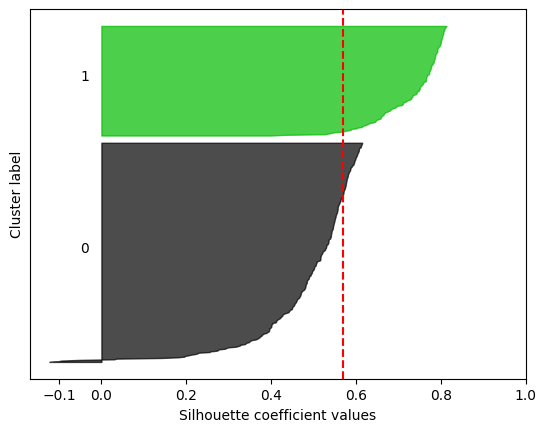

In [41]:
silhouette_plot(X, labels_k2)

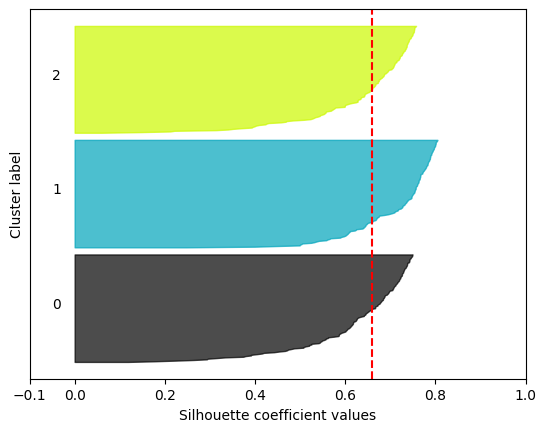

In [42]:
silhouette_plot(X, labels_k3)

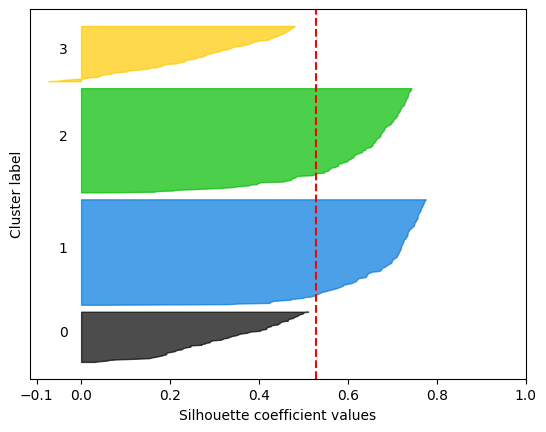

In [43]:
silhouette_plot(X, labels_k4)

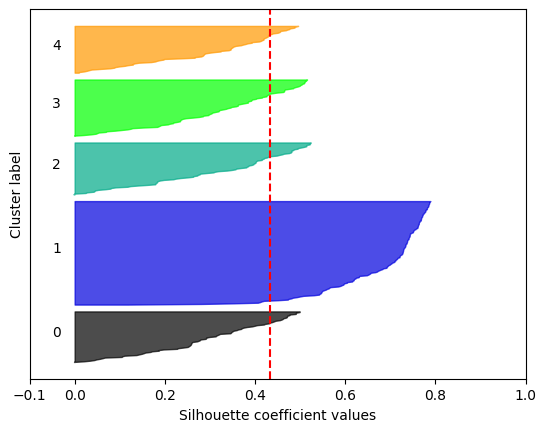

In [46]:
silhouette_plot(X, labels_k5)

### Calinski-Harabasz Index

A higher value of CHI indicates a better clustering, because it means that the data points are more spread out between clusters than they are within clusters.

In [25]:
from sklearn.metrics import calinski_harabasz_score

print(f'CH(2 clusters): {calinski_harabasz_score(X, labels_k2):.3f}')
print(f'CH(3 clusters): {calinski_harabasz_score(X, labels_k3):.3f}')
print(f'CH(4 clusters): {calinski_harabasz_score(X, labels_k4):.3f}')

CH(2 clusters): 733.964
CH(3 clusters): 1545.857
CH(4 clusters): 1178.759


The highest CHI score is achieved when k = 3.

### Davies-Bouldin Index

lower values of DB index indicate a better clustering with clusters that are compact and well-separated, where 0 is the lowest possible value.

In [26]:
from sklearn.metrics import davies_bouldin_score

print(f'BD(2 clusters): {davies_bouldin_score(X, labels_k2):.3f}')
print(f'BD(3 clusters): {davies_bouldin_score(X, labels_k3):.3f}')
print(f'BD(4 clusters): {davies_bouldin_score(X, labels_k4):.3f}')

BD(2 clusters): 0.627
BD(3 clusters): 0.480
BD(4 clusters): 0.858


## External Evaluation

### Contingency Matrix

We can build the contingency matrix in Scikit-Learn by calling the function `sklearn.metrics.cluster.contingency_matrix()`. This function takes as parameters the ground truth labels and the cluster labels to evaluate.

In [27]:
from sklearn.metrics.cluster import contingency_matrix

true_labels = [0, 0, 0, 1, 1, 1]
cluster_labels = [0, 0, 1, 1, 2, 2]

cm1 = contingency_matrix(true_labels, cluster_labels)
cm1

array([[2, 1, 0],
       [0, 1, 2]])

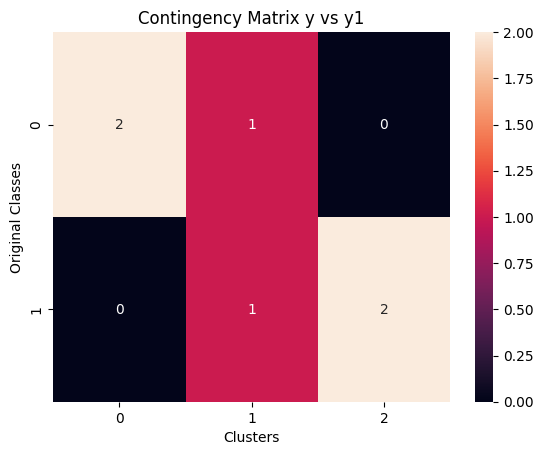

In [28]:
from seaborn import heatmap
ax = heatmap(cm1, annot=True, fmt="d")
ax.set_xlabel("Clusters")
ax.set_ylabel("Original Classes")
ax.set_title("Contingency Matrix y vs y1")
plt.show()

### (Adjusted) Rand Index

It is calculated as the ratio of the number of agreements between the cluster assignments and the class labels to the total number of pairs of data points

You can compute the Rand index in Scikit-Learn using the function sklearn.metrics.rand_score(). For example, the Rand index score for the labels defined above is:


In Scikit-Learn you can compute the adjusted Rand index using the function sklearn.metrics.adjusted_rand_score(). For example, the adjusted Rand index in our previous example is:

In [29]:
from sklearn.metrics import rand_score

true_labels = [0, 0, 0, 1, 1, 1]
cluster_labels = [0, 0, 1, 1, 2, 2]

print(f'RI = {rand_score(true_labels, cluster_labels):.3f}')

RI = 0.667


In [30]:
from sklearn.metrics import adjusted_rand_score

print(f'ARI = {adjusted_rand_score(true_labels, cluster_labels):.3f}')

ARI = 0.242


Cluster assignments that are independent of the class labels will have a lower Rand index, and their adjusted Rand index will be negative or close to 0

In [31]:
true_labels = [0, 0, 0, 1, 1, 1]
cluster_labels = [0, 1, 2, 0, 1, 2]

print(f'RI = {rand_score(true_labels, cluster_labels):.3f}')
print(f'ARI = {adjusted_rand_score(true_labels, cluster_labels):.3f}')

RI = 0.400
ARI = -0.364


Going back to our blobs dataset, since we have the ground truth labels of the data points (stored in the y variable), we can use external evaluation metrics to evaluate the three k-means clusterings we have obtained earlier. The ARI score of these clusterings are:

In [32]:
print(f'ARI(2 clusters): {adjusted_rand_score(y, labels_k2):.3f}')
print(f'ARI(3 clusters): {adjusted_rand_score(y, labels_k3):.3f}')
print(f'ARI(4 clusters): {adjusted_rand_score(y, labels_k4):.3f}')

ARI(2 clusters): 0.571
ARI(3 clusters): 1.000
ARI(4 clusters): 0.864


### Homogeneity, Completeness and V-Measure

These are **clustering evaluation metrics** used to assess how well a clustering algorithm has grouped data compared to ground truth labels. They are particularly useful when the true class labels of data points are known.


**1. Homogeneity**  
A clustering satisfies **homogeneity** if all clusters contain only data points that belong to the same **true** class.  

$$H = 1 - \frac{H(C|K)}{H(C)}$$

Where:  
- $H(C|K)$ is the conditional entropy of the class distribution given the cluster assignments.  
- $H(C)$ is the entropy of the true class distribution.  


- **High Homogeneity ($\approx 1$)** → Each cluster contains only points from a single class.  
- **Low Homogeneity ($\approx 0$)** → Clusters mix multiple classes.  


**2. Completeness**  
A clustering satisfies **completeness** if all data points that belong to the same **true** class are assigned to the same cluster.  

$$C = 1 - \frac{H(K|C)}{H(K)}$$
Where:  
- $H(K|C)$ is the conditional entropy of the clustering given the class distribution.  
- $H(K)$ is the entropy of the clustering.  


- **High Completeness ($\approx 1$)** → A single cluster contains all members of a true class.  
- **Low Completeness ($\approx 0$)** → A true class is spread across multiple clusters.  



**3. V-Measure (Harmonic Mean of Homogeneity & Completeness)**  
V-Measure is the **harmonic mean** of **Homogeneity** and **Completeness**, providing a balanced evaluation of clustering quality.  

$$V = (1 + \beta) \frac{H \cdot C}{(\beta \cdot H) + C}$$
- If **\(\beta = 1\)** (default), V-Measure is simply the harmonic mean:  
$$V = 2 \times \frac{H \cdot C}{H + C}$$


- High V-Measure ($\approx$ 1) : The clustering is both **homogeneous** and **complete**.  
- Low V-Measure ($\approx$ 0) : The clustering fails in both aspects.  

### **Example Interpretation:**  
Consider a dataset with three true classes: **A, B, C**  
- **Homogeneity = 1, Completeness = 0.5** → Each cluster has only one class, but class members are spread across clusters.  
- **Homogeneity = 0.5, Completeness = 1** → Each class is in a single cluster, but clusters contain mixed classes.  
- **V-Measure = 1** → Perfect clustering where each class corresponds to a single cluster.  



In [33]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

true_labels = [0, 0, 0, 1, 1, 1]
cluster_labels = [0, 0, 1, 1, 2, 2]

print(f'Homogeneity = {homogeneity_score(true_labels, cluster_labels):.3f}')
print(f'Completeness = {completeness_score(true_labels, cluster_labels):.3f}')
print(f'V-measure = {v_measure_score(true_labels, cluster_labels):.3f}')

Homogeneity = 0.667
Completeness = 0.421
V-measure = 0.516


Cluster assignments that are independent of the class labels have zero scores:

In [34]:
true_labels = [0, 0, 0, 1, 1, 1]
cluster_labels = [0, 1, 2, 0, 1, 2]

print(f'Homogeneity = {homogeneity_score(true_labels, cluster_labels):.3f}')
print(f'Completeness = {completeness_score(true_labels, cluster_labels):.3f}')
print(f'V-measure = {v_measure_score(true_labels, cluster_labels):.3f}')

Homogeneity = 0.000
Completeness = 0.000
V-measure = 0.000


In [35]:
print(f'V-measure(2 clusters): {v_measure_score(y, labels_k2):.3f}')
print(f'V-measure(3 clusters): {v_measure_score(y, labels_k3):.3f}')
print(f'V-measure(4 clusters): {v_measure_score(y, labels_k4):.3f}')

V-measure(2 clusters): 0.734
V-measure(3 clusters): 1.000
V-measure(4 clusters): 0.895


### Fowlkes-Mallows Index

It is defined as the geometric mean of the pairwise precision (the accuracy of grouped pairs of points) and recall (the completeness of correctly grouping pairs that belong together)

In [36]:
from sklearn.metrics import fowlkes_mallows_score

true_labels = [0, 0, 0, 1, 1, 1]
cluster_labels = [0, 0, 1, 1, 2, 2]

print(f'FMI = {fowlkes_mallows_score(true_labels, cluster_labels):.3f}')

FMI = 0.471


Cluster assignments that are independent of the class labels have a zero FMI score:

In [37]:
true_labels = [0, 0, 0, 1, 1, 1]
cluster_labels = [0, 1, 2, 0, 1, 2]

print(f'FMI = {fowlkes_mallows_score(true_labels, cluster_labels):.3f}')

FMI = 0.000


Let’s find the FMI scores of the clutserings of the blobs dataset:

In [38]:
print(f'FMI(2 clusters): {fowlkes_mallows_score(y, labels_k2):.3f}')
print(f'FMI(3 clusters): {fowlkes_mallows_score(y, labels_k3):.3f}')
print(f'FMI(4 clusters): {fowlkes_mallows_score(y, labels_k4):.3f}')

FMI(2 clusters): 0.774
FMI(3 clusters): 1.000
FMI(4 clusters): 0.909


### Normalized Mutual Info

NMI is also a supervised metric that helps us compare the fit of a set of clusters to a set of classes. It is based on information theory and probabilities.

In [39]:
from sklearn.metrics import normalized_mutual_info_score

print(f'NMI(2 clusters): {normalized_mutual_info_score(y, labels_k2):.3f}')
print(f'NMI(3 clusters): {normalized_mutual_info_score(y, labels_k3):.3f}')
print(f'NMI(4 clusters): {normalized_mutual_info_score(y, labels_k4):.3f}')

NMI(2 clusters): 0.734
NMI(3 clusters): 1.000
NMI(4 clusters): 0.895
